<a href="https://colab.research.google.com/github/noee123456/Repo-Ingenias-DS/blob/main/Segunda_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

# **"Listado de Estudios Ambientales"**

El presente AED tiene como finalidad hacer un análisis extenso al dataset "listado-de-estudios-ambientales" extraído de "www.datos.gob.ar"

1- Asignamos el dataset a una variable (df)

In [ ]:
df = pd.read_csv("listado-de-estudios-ambientales.csv")

2- Iniciamos un primer analisis de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10666 entries, 0 to 10665
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_estudio      10666 non-null  int64 
 1   fecha_estudio   10666 non-null  object
 2   tipo_estudio    10666 non-null  object
 3   concesion       9026 non-null   object
 4   yacimiento      5582 non-null   object
 5   empresa         10666 non-null  object
 6   caja            1800 non-null   object
 7   ubicacion       2648 non-null   object
 8   administrador   7789 non-null   object
 9   fecha_ingreso   10666 non-null  object
 10  fecha_data      10666 non-null  object
 11  objeto_estudio  10666 non-null  object
 12  nombre_objeto   10666 non-null  object
 13  observaciones   2932 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10666, 14)

In [ ]:
df.describe()

,id_estudio
count,10666.000000
mean,5456.029908
std,3358.861318
min,1.000000
25%,2200.000000
50%,5581.500000
75%,8386.750000
max,11155.000000


In [ ]:
df.head(10)

,id_estudio,fecha_estudio,tipo_estudio,concesion,yacimiento,empresa,caja,ubicacion,administrador,fecha_ingreso,fecha_data,objeto_estudio,nombre_objeto,observaciones
0,2390,2003-04-01,Monitoreo de obras y tareas,ACAMBUCO,NaN,YPF S.A.,NaN,NaN,NaN,2006-07-24,2006-07-24,Area costa adentro,Acambuco,NaN
1,908,1996-10-29,Estudio ambiental,VALLE DEL RIO GRANDE,NaN,YPF S.A.,35,Oficina 621,NaN,2006-07-24,2006-07-24,Pozo terrestre,EL PASILLO X-1,NaN
2,67,1993-11-20,Estudio ambiental base,VEGA GRANDE,NaN,PETROQUIMICA COMODORO RIVADAVIA S.A.,NaN,Oficina 615,NaN,2006-07-24,2006-07-24,Area costa adentro,Vega Grande,NaN
3,266,1993-08-15,Estudio ambiental,NaN,NaN,COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.,NaN,Oficina 615,NaN,2006-07-24,2006-07-24,Area costa adentro,Anticlinal Campamento,NaN
4,1041,1997-04-03,Monitoreo de obras y tareas,NaN,NaN,A.E.C. Argentina S.A.,BB,Oficina 621,NaN,2006-07-24,2006-07-24,Area costa adentro,1TICLINAL CAMPAMENTO,Expte 750-001400/97
5,793,1996-04-01,Monitoreo de obras y tareas,NaN,NaN,A.E.C. Argentina S.A.,II,Oficina 621,NaN,2006-07-24,2006-07-24,Area costa adentro,COVUNCO 1TICLINAL CAMPAMENTO EST1CIA VIEJA,NaN
6,1342,1998-06-29,Monitoreo de obras y tareas,NaN,NaN,A.E.C. Argentina S.A.,pp,Oficina 621,NaN,2006-07-24,2006-07-24,Area costa adentro,Anticlinal Campamento,NaN
7,1569,1999-04-14,Monitoreo de obras y tareas,NaN,NaN,A.E.C. Argentina S.A.,AB,Oficina 621,NaN,2006-07-24,2006-07-24,Area costa adentro,Anticlinal Campamento,NaN
8,1813,2000-06-15,Monitoreo de obras y tareas,NaN,NaN,A.E.C. Argentina S.A.,NaN,Oficina 621,NaN,2006-07-24,2006-07-24,Area costa adentro,Anticlinal Campamento,NaN
9,2063,2001-05-31,Monitoreo de obras y tareas,NaN,NaN,A.E.C. Argentina S.A.,NaN,NaN,NaN,2006-07-24,2006-07-24,Area costa adentro,Anticlinal Campamento,NaN


In [ ]:
df.tail(10)

,id_estudio,fecha_estudio,tipo_estudio,concesion,yacimiento,empresa,caja,ubicacion,administrador,fecha_ingreso,fecha_data,objeto_estudio,nombre_objeto,observaciones
10656,11146,2024-01-31,Cronograma de abandono de Pozo (Res. 05/96),COIRON AMARGO SUR ESTE,NaN,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Cronograma NQN 2024 - CASE,NaN
10657,11147,2024-01-31,Cronograma de abandono de Pozo (Res. 05/96),AGUADA DE CASTRO,NaN,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Cronograma NQN 2024 - ACAS,NaN
10658,11148,2024-01-31,Cronograma de abandono de Pozo (Res. 05/96),AGUADA CÁNEPA,NaN,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Cronograma 2024 NQN - ACA,NaN
10659,11149,2024-01-31,Cronograma de abandono de Pozo (Res. 05/96),AGUADA PICHANA OESTE,AGUADA PICHANA OESTE,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Cronograma NQN 2024 - APO,NaN
10660,11150,2024-01-31,Inf. De Abandono de Pozos (Res. 05/96),LINDERO ATRAVESADO,LINDERO ATRAVESADO OCCIDENTAL,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Informe LA-58,NaN
10661,11151,2024-01-31,Inf. De Abandono de Pozos (Res. 05/96),LINDERO ATRAVESADO,LINDERO ATRAVESADO OCCIDENTAL,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Informe POZO LA-52 Abandono,NaN
10662,11152,2024-01-31,Inf. De Abandono de Pozos (Res. 05/96),LINDERO ATRAVESADO,LINDERO ATRAVESADO OCCIDENTAL,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Informe POZO LA-95 Abandono,NaN
10663,11153,2024-01-31,Inf. De Abandono de Pozos (Res. 05/96),LINDERO ATRAVESADO,LINDERO ATRAVESADO OCCIDENTAL,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Informe POZO LA-96 Abandono,NaN
10664,11154,2024-01-31,Inf. De Abandono de Pozos (Res. 05/96),LINDERO ATRAVESADO,LINDERO ATRAVESADO OCCIDENTAL,PAN AMERICAN ENERGY SL,NaN,NaN,PAESL,2024-04-13,2024-04-13,Pozo terrestre,Informe POZO LA-99 Abandono,NaN
10665,11155,2024-02-29,Monitoreo de obras y tareas,GRAN BAJO ORIENTAL,GRAN BAJO ORIENTAL,TECPETROL S.A.,NaN,NaN,Tecpetrol,2024-04-18,2024-04-18,Yacimiento,IMAA 2023 GBO,IMAA 2023 GBO


3- empezamos a chequear valores faltantes

In [ ]:
df.isna().sum()

id_estudio           0
fecha_estudio        0
tipo_estudio         0
concesion         1640
yacimiento        5084
empresa              0
caja              8866
ubicacion         8018
administrador     2877
fecha_ingreso        0
fecha_data           0
objeto_estudio       0
nombre_objeto        0
observaciones     7734
dtype: int64

In [ ]:
df.isna().sum() / len(df) * 100

id_estudio         0.000000
fecha_estudio      0.000000
tipo_estudio       0.000000
concesion         15.375961
yacimiento        47.665479
empresa            0.000000
caja              83.123945
ubicacion         75.173448
administrador     26.973561
fecha_ingreso      0.000000
fecha_data         0.000000
objeto_estudio     0.000000
nombre_objeto      0.000000
observaciones     72.510782
dtype: float64

4---- Empezamos a limpiar o reorganizar los datos

Eliminamos columnas que no aportan valor significativo al análisis así como también filas con algún valor faltante

In [ ]:
df.drop(['concesion', 'caja', 'yacimiento', 'observaciones', 'id_estudio'], axis=1)
df.dropna(axis=0)

,id_estudio,fecha_estudio,tipo_estudio,concesion,yacimiento,empresa,caja,ubicacion,administrador,fecha_ingreso,fecha_data,objeto_estudio,nombre_objeto,observaciones
3395,3902,1995-03-21,Monitoreo de obras y tareas,PAMPA DEL CASTILLO - LA GUITARRA,PAMPA DEL CASTILLO - LA GUITARRA,CÑIA.NAVIERA PEREZ COMPANC SACFIMFA,A,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,Pampa del Castillo,antes N° 11
3396,3903,1995-03-31,Monitoreo de obras y tareas,KOLUEL KAIKE - EL VALLE,KOLUEL KAIKE,CÑIA.NAVIERA PEREZ COMPANC SACFIMFA,A,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,El Valle Koluel Kaike,antes N° 13
3400,3908,1995-03-21,Monitoreo de obras y tareas,25 DE MAYO - MEDANITO SUD ESTE,25 DE MAYO - MEDANITO SUDESTE,CÑIA.NAVIERA PEREZ COMPANC SACFIMFA,A,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,25 de Mayo Medanito,antes N° 54 Monitoreo de Obras y Tareas
3402,3910,1995-04-12,Monitoreo de obras y tareas,CAÑADON AMARILLO,CAÑADON AMARILLO,CÑIA.NAVIERA PEREZ COMPANC SACFIMFA,A,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,CaNadon Amarillo,antes N° 55 Monitoreo de obras y tareas
3403,3911,1995-03-24,Monitoreo de obras y tareas,PIEDRAS COLORADAS - ESTRUCTURA INTERMEDIA,PIEDRAS COLORADAS,CÑIA.NAVIERA PEREZ COMPANC SACFIMFA,A,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,PIEDRAS COLORADAS ESTRUCTURA INTERMEDIA,antes N° 61Monitoreo de obres y tareas
3404,3912,1995-03-21,Monitoreo de obras y tareas,FARO VIRGENES,FARO VIRGENES,CÑIA.NAVIERA PEREZ COMPANC SACFIMFA,A,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,Faro Virgenes,antes N° 62 Monitoreo do obras y tareas
3435,3938,1995-04-17,Monitoreo de obras y tareas,CERRO WENCESLAO,CERRO WENCESLAO,C.A.D.I.P.S.A.,N,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,Cerro Wenceslao,antes N° 207
3439,3942,1995-03-31,Monitoreo de obras y tareas,PIEDRA CLAVADA,PIEDRA CLAVADA,Bridas S.A.P.I.C.,N,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,Piedra Clavada,antes N° 239
3441,3944,1995-03-31,Monitoreo de obras y tareas,EL CORDON,EL CORDON,Bridas S.A.P.I.C.,N,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,El Cordon,antes N° 240
3446,3949,1995-03-31,Monitoreo de obras y tareas,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,Bridas S.A.P.I.C.,N,Oficina 621,prueba,2006-07-24,2006-07-24,Area costa adentro,Estacion Fernandez Oro,Sismicaantes N° 242


## GRAFICOS

-Comenzamos realizando un grafico de barras para ver a que oficinas corresponden las actividades expuestas en el Dataset.

In [ ]:
#Primero analizamos el conteo de la información contenida en tal columna y si es factible graficarlo
df.groupby('ubicacion').count()

,id_estudio,fecha_estudio,tipo_estudio,concesion,yacimiento,empresa,caja,administrador,fecha_ingreso,fecha_data,objeto_estudio,nombre_objeto,observaciones
ubicacion,,,,,,,,,,,,,
Oficina 402,1,1,1,0,0,1,0,1,1,1,1,1,1
Oficina 505,172,172,172,86,26,172,3,49,172,172,172,172,70
Oficina 615,265,265,265,220,9,265,36,32,265,265,265,265,16
Oficina 617,185,185,185,135,0,185,14,15,185,185,185,185,38
Oficina 621,2025,2025,2025,1414,206,2025,1617,512,2025,2025,2025,2025,263


<Axes: xlabel='ubicacion', ylabel='count'>

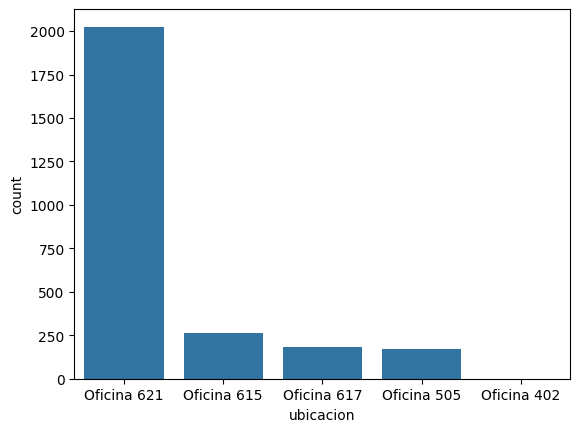

In [ ]:
sns.countplot(data=df, x= 'ubicacion')


Ahora hacemos lo mismo pero para las empresas

In [ ]:
df.groupby('empresa').count()


,id_estudio,fecha_estudio,tipo_estudio,concesion,yacimiento,caja,ubicacion,administrador,fecha_ingreso,fecha_data,objeto_estudio,nombre_objeto,observaciones
empresa,,,,,,,,,,,,,
A.E.C. Argentina S.A.,26,26,26,8,0,17,18,2,26,26,26,26,3
ALIANZA PETROLERA ARGENTINA S.A.,49,49,49,40,26,14,17,28,49,49,49,49,13
AMOCO ANDINA PRODUCTION COMPANY,2,2,2,0,0,1,1,2,2,2,2,2,1
AMPOLEX S.A.,2,2,2,2,0,0,2,0,2,2,2,2,1
ANDERMAN SMITH ARGENTINA INC.,1,1,1,1,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VISTA ENERGY ARGENTINA SAU,63,63,63,63,61,0,0,63,63,63,63,63,51
VISTA OIL & GAS ARGENTINA SAU,58,58,58,58,49,0,0,58,58,58,58,58,44
WINTERSHALL DEA ARGENTINA S.A,3,3,3,3,3,0,0,3,3,3,3,3,0


In [ ]:
df['empresa'].describe()

count        10666
unique         162
top       YPF S.A.
freq          2638
Name: empresa, dtype: object

En éste caso notamos que hay una amplia variedad de empresas -por no decir muchísimas- y sería imposible plantear un gráfico de barras, analizamos otras opciones

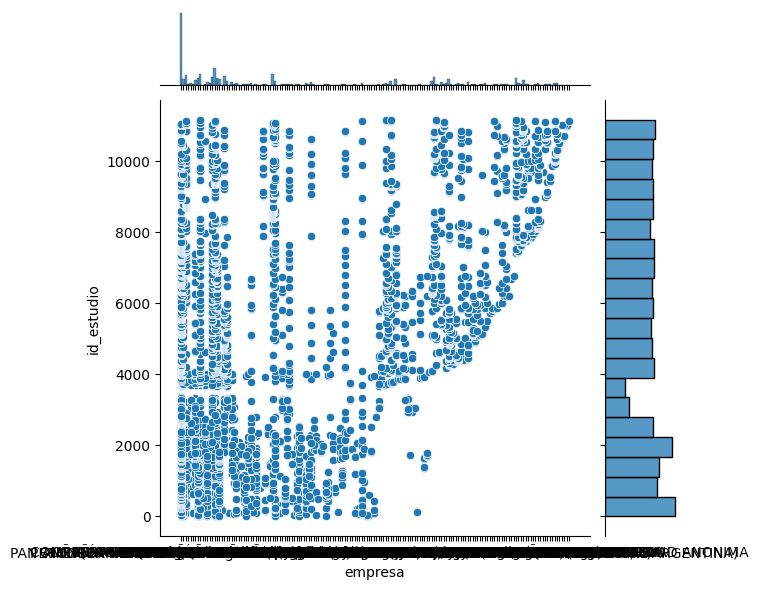

In [ ]:
sns.jointplot(data=df, x='empresa', y='id_estudio')

El exceso de variables es innegables, se replantea seguir trabajando con tantas variables y hacer un "top 10" de Empresas con más trabajos realizados y relegar las demas a categoria "otros"

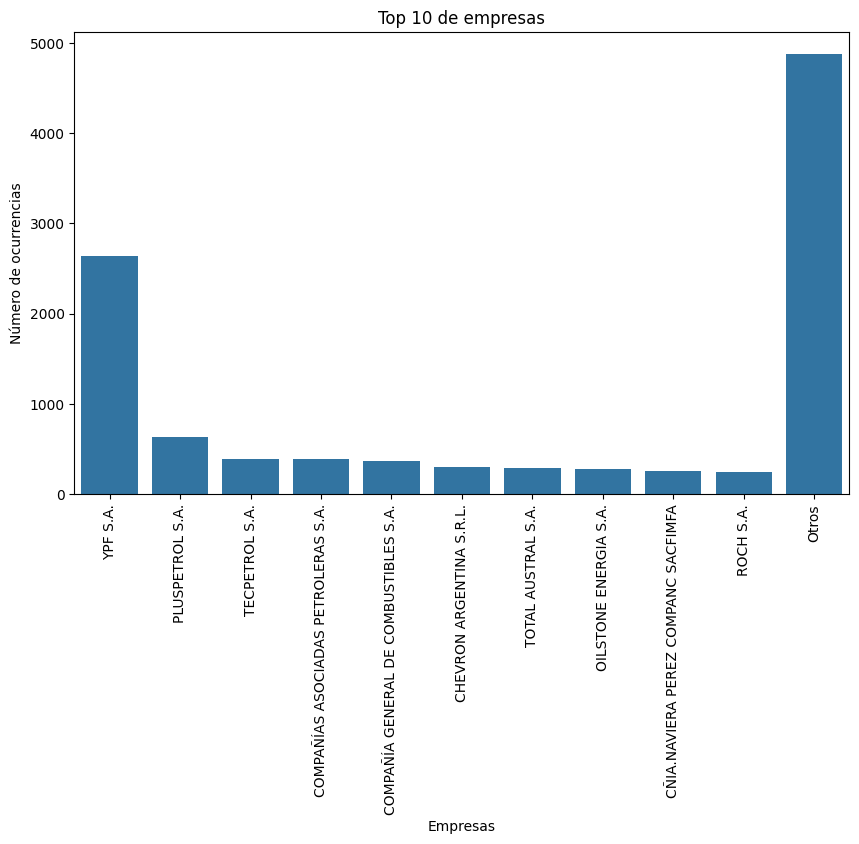

In [ ]:
# Contamos nuevamente la frecuencia de cada empresa
empresa_counts = df['empresa'].value_counts()

# Seleccionanamos las 10 empresas principales y agrupar el resto como 'Otros'
top_10_empresas = empresa_counts.head(10)
otros_empresas_count = empresa_counts.iloc[10:].sum()  # Suma de las frecuencias del resto de empresas
top_10_empresas['Otros'] = otros_empresas_count

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_empresas.index, y=top_10_empresas.values)
plt.xlabel('Empresas')
plt.ylabel('Número de ocurrencias')
plt.title('Top 10 de empresas')
plt.xticks(rotation=90)
plt.show()


Ahora sí, podemos notar una importante diferencia en la visualización de los datos y podemos notar:
- Los principales acreedores de los estudios realizados son "YPF S.A" y la categoría de "Otros"

procedemos a analizar los años en los que fueron realizados los estudios

In [ ]:
# Convertimos los datos de la columna de tipo "objeto" a "datetime"
df['fecha_estudio'] = pd.to_datetime(df['fecha_estudio'], format="ISO8601", errors="coerce")
#chequeamos que se haya hecho correctamente
df['fecha_estudio'].head(10)

0   2003-04-01
1   1996-10-29
2   1993-11-20
3   1993-08-15
4   1997-04-03
5   1996-04-01
6   1998-06-29
7   1999-04-14
8   2000-06-15
9   2001-05-31
Name: fecha_estudio, dtype: datetime64[ns]

In [ ]:
df['fecha_estudio'].dtype

dtype('<M8[ns]')

Vemos que exitosamente se pudo convertir, procedemos a seguir con los gráficos